<div class="alert alert-block alert-info">
    <img style="float: right;" src="./material/OSE.svg" width="50">
    <u><h1>The Career Decisions of Young Men</h1></u>
</div>

This notebook processes and explores the estimation sample used by Michael Keane and Kenneth Wolpin to study the career decisions of young men. 

> Keane, M. P. and Wolpin, K. I. (1997). [The career decisions of young men](http://www.journals.uchicago.edu/doi/10.1086/262080). *Journal of Political Economy*, 105(3), 473-522.

Keane & Wolpin (1997) construct their sample based on the [National Longitudinal Survey of Youth 1979 (NLSY79)](https://www.bls.gov/nls/nlsy79.htm) (Bureau of Labor Statistics, 2019). The NLSY79 is a nationally representative sample of young men and women living in the United States in 1979 and born between 1957 and 1964. Individuals were followed from 1979 onwards and repeatedly interviewed about their educational decisions and labor market experiences. Based on this information, individuals are assigned to either working in one of the three occupations, attending school, or simply staying at home. The decision period is the school year.


They restrict attention to white males that turn 16 between 1977 and 1981 and exploit the information collected between 1979 and 1987. Thus individuals in the sample are all between 16 and 26 years old. While the sample initially consists of 1,373 individuals at age 16, this number drops to 256 at the age of 26 due to sample attrition, missing data, and the short observation period. Overall, the final sample consists of 12,359 person-period observations.

The data is available to download [here](https://github.com/OpenSourceEconomics/ekw-data/blob/master/career-decisions/career-decisions.raw). 

<div class="alert alert-block alert-info">
    <h3>Preparations</h3>
</div>

We first peform some basic preparations to ease further processing.

In [1]:
# flake8-noqa-cell-E402-E114-E116
import sys

sys.path.insert(0, "material/")

import pandas as pd

from career_decisions_analysis import get_prepare_career_decisions_data
from career_decisions_analysis import get_working_experience
from career_decisions_analysis import get_choices
from career_decisions_analysis import get_average_wages
from career_decisions_analysis import get_initial_schooling
from career_decisions_analysis import get_initial_schooling_activity
from career_decisions_analysis import make_transition_matrix
from career_decisions_analysis import get_df_transition_probabilities

from career_decisions_plot import plot_sample_size
from career_decisions_plot import plot_decisions_by_age
from career_decisions_plot import plot_wage_moments
from career_decisions_plot import plot_initial_schooling
from career_decisions_plot import plot_transition_heatmap

from career_decisions_auxiliary import display_side_by_side

pd.options.display.float_format = "{:,.2f}".format

In [2]:
df = get_prepare_career_decisions_data("career-decisions.raw")

Calculate the work experience for later calculations and reference.

In [3]:
df = df.groupby("Identifier").apply(lambda x: get_working_experience(x))

<div class="alert alert-block alert-info">
    <h3>Basic Structure</h3>
</div>



First we explore the basic structure of the dataset. All individuals enter the model initially at the same age and are then observed for a varying number of consecutive years. Each year, the individual's decision to work in either a white or blue collar occupation, attend school, enroll in the miliary, or remain at home is recorded. If working, the dataset potentially also contains that year's wage as a full-time equivalent.

In [4]:
df.head(15)

Age  schooling_experience        Choice      Wage  \
Identifier Period                                                      
6          0        16                    11     schooling       nan   
           1        17                    12     schooling       nan   
           2        18                    13     schooling       nan   
           3        19                    14     schooling       nan   
           4        20                    15     schooling       nan   
           5        21                    16          home       nan   
           6        22                    16  white_collar 14,062.67   
           7        23                    16  white_collar 15,921.17   
           8        24                    16  white_collar 18,602.73   
           9        25                    16  white_collar 19,693.95   
           10       26                    16  white_collar 20,611.00   
7          0        16                    10     schooling       nan   
           1        17                    11     schooling       nan   
           2        18                    12   blue_collar 18,795.29   
           3        19                    12      military  9,647.86   

                   blue_collar_experience  white_collar_experience  \
Identifier Period                                                    
6          0                          nan                      nan   
           1                         0.00                     0.00   
           2                         0.00                     0.00   
           3                         0.00                     0.00   
           4                         0.00                     0.00   
           5                         0.00                     0.00   
           6                         0.00                     0.00   
           7                         0.00                     1.00   
           8                         0.00                     2.00   
           9                         0.00                     3.00   
           10                        0.00                     4.00   
7          0                          nan                      nan   
           1                         0.00                     0.00   
           2                         0.00                     0.00   
           3                         1.00                     0.00   

                   military_experience  
Identifier Period                       
6          0                       nan  
           1                      0.00  
           2                      0.00  
           3                      0.00  
           4                      0.00  
           5                      0.00  
           6                      0.00  
           7                      0.00  
           8                      0.00  
           9                      0.00  
           10                     0.00  
7          0                       nan  
           1                      0.00  
           2                      0.00  
           3                      0.00

The figure below illustrates the decision tree in the model. In each period, individual can decide anew to either work in the labor market, go to school, or simply stay at home.

<img src="material/fig-decision-tree.pdf" alt="Decision Tree" style="width:750px;" align="left"/>

We start it with more than 1,300 observations at age 16, but then end up with less than 300 for age 26.

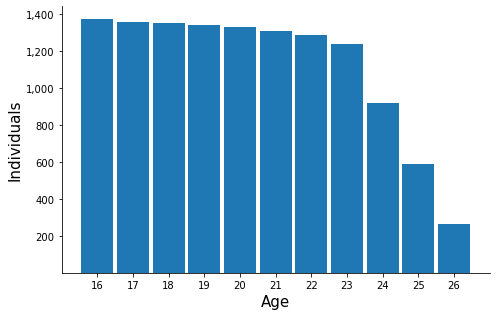

In [5]:
plot_sample_size(df)

<div class="alert alert-block alert-info">
    <h3>Basic Descriptives</h3>
</div>

Now we are ready to reproduce some descriptive statistics from the paper.

### Choices
---

We reproduce the distribution of individuals across the different alternatives as reported in Tabel 1.

In [6]:
display_side_by_side(get_choices(df)["total"], get_choices(df)["share"])

,Blue,White,Military,Schooling,Home,All
Age,,,,,,
16,45,4,1,1178,145,1373
17,113,15,20,1014,197,1359
18,331,92,70,561,296,1350
19,406,115,107,420,293,1341
20,454,149,113,341,273,1330
21,498,170,106,275,257,1306
22,559,256,90,169,212,1286
23,546,336,68,105,185,1240
24,416,284,44,65,112,921


 A more visually appealing version is presented below.

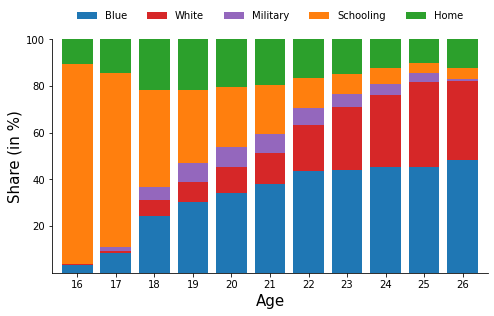

In [7]:
plot_decisions_by_age(df)

Initially, roughly 86\% of individuals are enrolled in school, but this share steadily declines with age. Nevertheless, about 39\% obtain more than a high school degree and continue their education for more than twelve years. As individuals leave school, most of them initially pursue a blue-collar occupation. But the relative share of the white-collar occupation increases as individuals entering the labor market later have higher levels of schooling. At age 26, about 48\% work in a white-collar occupation and 34\% in a blue-collar occupation. The share of individuals in the military peaks around age 20 with 8 \%. At its maximum around age 18, approximately 20\% of individuals stay at home.

### Wages
---

We reproduce the average real wages by occupation.

In [8]:
get_average_wages(df)

,White,Blue,Military,All
Age,,,,
16,"9,320.76","10,286.74",nan,"10,217.74"
17,"10,049.76","11,572.89","9,005.36","11,036.60"
18,"11,775.34","12,603.82","10,171.87","12,060.75"
19,"12,376.42","12,949.84","9,714.60","12,246.68"
20,"13,824.01","14,363.66","10,852.51","13,635.87"
21,"15,578.14","15,313.45","12,619.37","14,977.00"
22,"20,236.08","16,947.90","13,771.56","17,561.28"
23,"20,745.56","17,884.95","14,868.65","18,719.84"
24,"24,066.64","19,245.19","15,910.84","20,942.42"


The average wages in the blue-collar occupation are initially highest with about \\$ 10,286, while wages in the white-collar occupation and military start around \\$ 9,000. However, wages in the white-collar occupation increase steeper over time and overtake blue-collar wages around age 21. At the end of the observation period, wages in the white-collar occupation are about 50\% higher compared to blue-collar wages with \\$ 32,756 as opposed to only \\$ 20,739. Military wages remain lowest throughout.

### Wage Moments

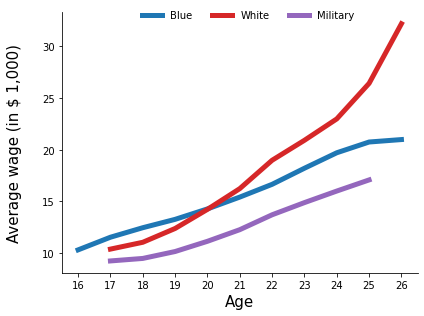

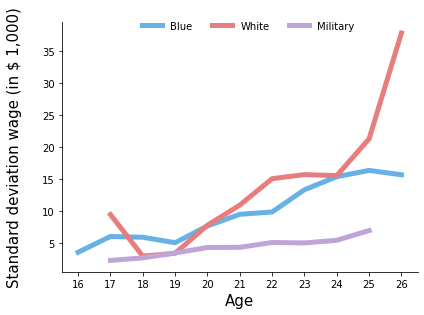

In [9]:
plot_wage_moments(df, savgol=True)

### Initial Schooling
---


In [10]:
get_initial_schooling(df)[0]

,Years,Number,Frequency
0,7,13,0.01
1,8,58,0.04
2,9,277,0.20
3,10,922,0.67
4,11,103,0.08


Individuals that enter the model differ with respect to their unobservable type $\{{\bf{e}}_{a,t}\}_{a \in \mathcal{A}}$ and the level of initial schooling. The following table and figure illustrate the distribution of initial schooling. Two-thirds of individuals (67.15%) enter with 10 years of schooling, while 20.18 + 4.22 + 0.01 = 24.41% 
of individuals have less than 10 years of schooling, and 7.5% of individuals were 11 years in school. The average years of initial schooling in the sample amounts to 9.76 years.

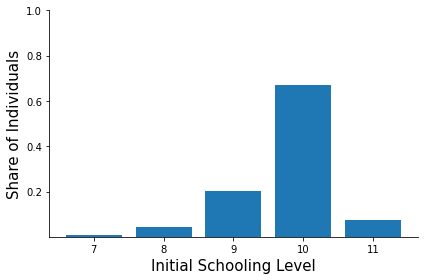

In [11]:
plot_initial_schooling(get_initial_schooling(df)[1])

In [12]:
get_initial_schooling_activity(df)

,7,8,9,10,11
Blue,4.15,4.18,4.06,3.15,3.19
White,0.10,0.27,0.54,1.03,1.21
Military,0.02,0.11,0.35,0.51,0.68
School,0.12,0.29,1.00,2.35,2.56
Home,5.00,4.50,3.21,2.11,1.58
Total,9.39,9.36,9.17,9.16,9.23


The amount of schooling an individual obtains is an important determinant for life cycle decisions (cite some work?). The following table illustrates the years spent on each activity by initial level of schooling. Some patterns emerge:


- Years spent in blue-collar occupations decrease with the initial level of schooling. While individuals with 7 years of initial schooling work on average 4.15 in a blue-collar occupation, individuals that have 11 years of schooling spend only 3.19 years in a blue-collar occupation.    


- Year spent in white-collar occupations increase with the initial level of schooling. In particular, nearly no individual with only 7 years of schooling is occupied in a white-collar job. While individuals at the top distribution spend on average 1.21 years in white-collar ocucpations.



- The initial level of schooling is a strong predictor for additional schooling. While individuals who enter the model with only 7 years of schooling do not even spend 2 more month in school (on average), those with 11 years of initial schooling add on average 2.5 years. 


Notably, the descriptives are derived under the instance that the average duration of individuals in the sample differs by the level of initial schooling. Individuals with 7 years of initial schooling are observed for 9.4 periods, while individuals with 10 years of initial schooling are only observed for 9.16 years.

### Transition Matrix
---

We will illustrate two directions of transition probabilities:
- `origin_to_destination`  
Percentage of individuals who are in an originating alternative in $t$ (column) and will be in a destination alternative in $t+1$ (row). 
    * *Example 1:* 64% of the time, an individual who is in school currently, will be in the school the next year.   
    * *Example 2:* 10% of the time, an individual who is in a blue-collar occupation currently, will be in a white-collar occupation next year.   


- `destination_from_origin`   
Percentage of individual who are in a destinating alternative in $t$ (column) and were in a certain originating alternative in $t-1$ (row).
    * *Example 1:* 87% of the time, an individual who is in school at $t$ was also in school in $t-1$.
    * *Example 1:* 18% of the time, an individual who is employed in a white-collar occupation at $t$ worked in a blue-collar occupation in $t-1$.
   

In [13]:
get_df_transition_probabilities(make_transition_matrix(df), "origin_to_destination")

,Blue,White,Military,Schooling,Home
Blue,0.73,0.10,0.01,0.03,0.12
White,0.20,0.67,0.01,0.06,0.06
Military,0.10,0.03,0.80,0.01,0.06
Schooling,0.12,0.09,0.02,0.64,0.13
Home,0.31,0.08,0.04,0.10,0.47


In [14]:
get_df_transition_probabilities(make_transition_matrix(df), "destination_from_origin")

,Blue,White,Military,Schooling,Home
Blue,0.62,0.07,0.02,0.13,0.16
White,0.18,0.52,0.01,0.20,0.09
Military,0.04,0.01,0.73,0.11,0.11
Schooling,0.04,0.03,0.00,0.87,0.06
Home,0.20,0.04,0.02,0.27,0.46


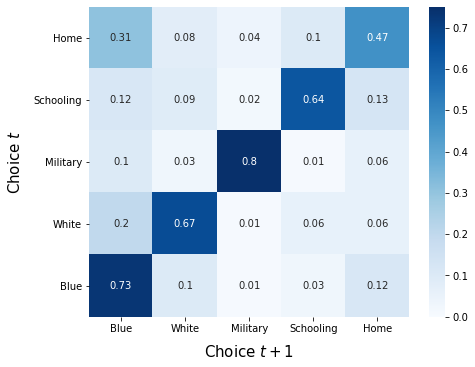

In [15]:
plot_transition_heatmap(make_transition_matrix(df))

**Some Facts**

The diagonal indicates that choices are quite persistent. There is limited mobility between white and blue collar occupations. However, more people transition from a white-collar to a blue-collar occupation than from a white-collar to a blue-collar occupation. Blue-collar workers are twice more likely to transition into home than white-collar workers. Individuals who are not in school at a certain will most likely not return to school.

### Important Note on Transition Probabilities

In the original data set choices at age 15 are not available. Consequently, the transition probabilities reported in Table 2 (Keane and Wolpin, 1997, p.487) cannot be replicated. However, their transition probabilities can be approximated by imputing schooling exprience for individuals at age 15. We use the following rule:
- If an individual at age 16 has 9 or more years of schooling, then he was in school at age 15.
- If an individual at age 16 has less than 9 years of schooling, then he was not in school at age 15.

To incorporate individuals at age 15 in the calculation of the transition matrix we can set 
```python 
make_transition_matrix(df, include_fifteen = True)  .
```

As the following transition matrix shows, the probabilities for schooling are closer to those reported in Keane and Wolpin (1997, p.487).

In [16]:
get_df_transition_probabilities(make_transition_matrix(df, include_fifteen = True), "origin_to_destination")

,Blue,White,Military,Schooling,Home
Blue,0.73,0.10,0.01,0.03,0.12
White,0.20,0.67,0.01,0.06,0.06
Military,0.10,0.03,0.80,0.01,0.06
Schooling,0.10,0.07,0.01,0.70,0.12
Home,0.31,0.08,0.04,0.11,0.47


## References
---

> Bureau of Labor Statistics, U.S. Department of Labor. [National Longitudinal Survey of Youth 1979 cohort, 1979-2016 (rounds 1-27)](https://www.nlsinfo.org/content/getting-started). *Produced and distributed by the Center for Human Resource Research (CHRR)*, The Ohio State University. Columbus, OH: 2019.

> Keane, M., & Wolpin, K. (1997). [The Career Decisions of Young Men](https://www.jstor.org/stable/10.1086/262080?seq=1#metadata_info_tab_contents). *Journal of Political Economy* 105, no.3, 473-522.